In [3]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load compressed dataframe
train_data = pd.read_pickle("Compressed_Data/train.pkl")

In [5]:
# Adjust dataframe columns
train_data.columns = ['Date','Customer_Code','Employee_Index','Customers_Country_Residence','Sex','Age','Date_Acc_Open','New_customer_index','Customer_Seniority','Primary_Customer','Last_Date_Primary_Customer','Customer_Type_Beginning_Month','Customer_Relation_Type_Beginning_Month','Residence_Index','Foreigner_Index','Spouse_Index','Channel_Customer_join','Deceased_Index','Address_Type','Province_Code','Province_Name','Activity_Index','Household_Income','Segmentation','Saving_Account','Guarantees','Current_Account','Derivada_Account','Payroll_Account','Junior_Account','MAS_Particular_Account','Particular_Account','Particular_Plus_Account','Short_Term_Deposit','Medium_Term_Deposit','Long_Term_Deposit','E_Account','Funds','Mortgage','Pensions1','Loans','Taxes','Credit_card','Securities','Home_Account','Payroll','Pensions2','Direct_Debit']

In [6]:
train_data.head(5)

,Date,Customer_Code,Employee_Index,Customers_Country_Residence,Sex,Age,Date_Acc_Open,New_customer_index,Customer_Seniority,Primary_Customer,...,Mortgage,Pensions1,Loans,Taxes,Credit_card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0.0,0,0,0,0,0,0.0,0.0,0


In [7]:
# Look for unique value in the columns of the dataframe
for column in train_data.columns:
    print("Column - "+column)
    print(train_data[column].unique())
    print("\n*****************************************************************\n")

Column - Date
['2015-01-28T00:00:00.000000000' '2015-02-28T00:00:00.000000000'
 '2015-03-28T00:00:00.000000000' '2015-04-28T00:00:00.000000000'
 '2015-05-28T00:00:00.000000000' '2015-06-28T00:00:00.000000000'
 '2015-07-28T00:00:00.000000000' '2015-08-28T00:00:00.000000000'
 '2015-09-28T00:00:00.000000000' '2015-10-28T00:00:00.000000000'
 '2015-11-28T00:00:00.000000000' '2015-12-28T00:00:00.000000000'
 '2016-01-28T00:00:00.000000000' '2016-02-28T00:00:00.000000000'
 '2016-03-28T00:00:00.000000000' '2016-04-28T00:00:00.000000000'
 '2016-05-28T00:00:00.000000000']

*****************************************************************

Column - Customer_Code
[1375586 1050611 1050612 ... 1173729 1164094 1550586]

*****************************************************************

Column - Employee_Index
[N, NaN, A, B, F, S]
Categories (5, object): [N, A, B, F, S]

*****************************************************************

Column - Customers_Country_Residence
[ES, NaN, CA, CH, CL, ..., ZW

[1, NaN, 3, 2, 1.0, ..., 4.0, P, 4, 4, 2]
Length: 14
Categories (13, object): [1, 3, 2, 1.0, ..., P, 4, 4, 2]

*****************************************************************

Column - Customer_Relation_Type_Beginning_Month
[A, I, NaN, P, R, N]
Categories (5, object): [A, I, P, R, N]

*****************************************************************

Column - Residence_Index
[S, NaN, N]
Categories (2, object): [S, N]

*****************************************************************

Column - Foreigner_Index
[N, S, NaN]
Categories (2, object): [N, S]

*****************************************************************

Column - Spouse_Index
[NaN, N, S]
Categories (2, object): [N, S]

*****************************************************************

Column - Channel_Customer_join
[KHL, KHE, KHD, KFA, KFC, ..., KDL, 025, KHP, KHR, KHS]
Length: 163
Categories (162, object): [KHL, KHE, KHD, KFA, ..., 025, KHP, KHR, KHS]

*****************************************************************

C

In [8]:
# Replace different representations of na values by np.nan
different_nan_representations = ['     NA',' NA','NaT','NA','025']
train_data.replace(to_replace=different_nan_representations,value=np.nan,inplace=True)

In [9]:
# Columns present in the dataframe
train_data.columns

Index(['Date', 'Customer_Code', 'Employee_Index',
       'Customers_Country_Residence', 'Sex', 'Age', 'Date_Acc_Open',
       'New_customer_index', 'Customer_Seniority', 'Primary_Customer',
       'Last_Date_Primary_Customer', 'Customer_Type_Beginning_Month',
       'Customer_Relation_Type_Beginning_Month', 'Residence_Index',
       'Foreigner_Index', 'Spouse_Index', 'Channel_Customer_join',
       'Deceased_Index', 'Address_Type', 'Province_Code', 'Province_Name',
       'Activity_Index', 'Household_Income', 'Segmentation', 'Saving_Account',
       'Guarantees', 'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit'],
      dtype='object')

In [30]:
def generate_viz(data,column_name):
    """Function of generate column visualizations"""
    if str(data[column_name].dtype) == "category":
        print("Datatype - category")
        column = train_data[column_name][train_data[column_name].notnull()]
        column.value_counts().plot(kind='bar')
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.show()
    elif str(data[column_name].dtype) == 'datetime64[ns]':
        print("Datatype - datetime64[ns]")
        plt.hist(train_data['Date'])
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.show()
        print("Datatype - ",train_data['Date'].dtype)
    else:
        column = train_data[column_name][train_data[column_name].notnull()].astype('int')
        print("Datatype - ",train_data[column_name].dtype)
        plt.hist(column)
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.show()
        plt.cla()
        plt.boxplot(column)
    print("Percent of null values - ",train_data[column_name].isnull().sum()/len(train_data) * 100," %")      

Datatype - datetime64[ns]


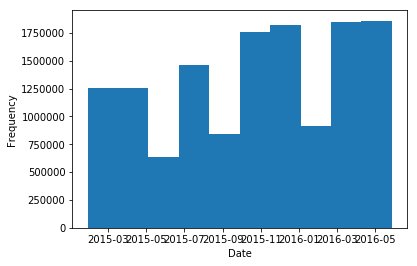

Datatype -  datetime64[ns]
Percent of null values -  0.0  %


In [31]:
generate_viz(train_data,'Date')

Datatype -  int64


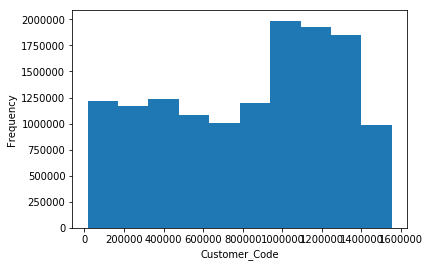

Percent of null values -  0.0  %


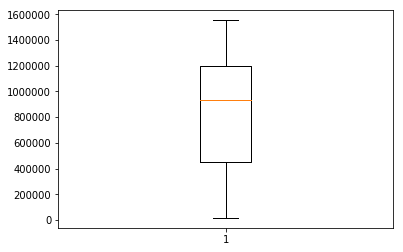

In [32]:
generate_viz(train_data,'Customer_Code')

Datatype - category


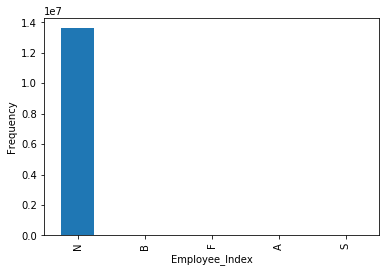

Percent of null values -  0.2032195504622926  %


In [33]:
generate_viz(train_data,'Employee_Index')

In [78]:
# All values are N(Not an employee) or nan so no new information - TO DROP
train_data.drop('Employee_Index',axis=1,inplace=True)

Datatype - category


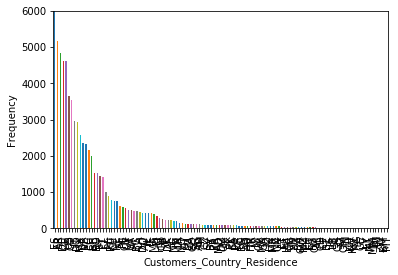

Percent of null values -  0.0  %


In [34]:
# generate_viz(train_data,'Customers_Country_Residence')
column_name = 'Customers_Country_Residence'
print("Datatype - category")
column = train_data[column_name][train_data[column_name].notnull()]
column.value_counts().plot(kind='bar')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.ylim(top=6000)
plt.show()
print("Percent of null values - ",train_data['Date'].isnull().sum()/len(train_data) * 100," %")      

Datatype - category


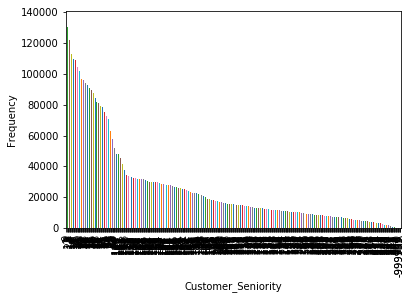

Percent of null values -  0.2032195504622926  %


In [35]:
generate_viz(train_data,'Customer_Seniority')

In [94]:
# Replace -999999 with np.nan
train_data['Customer_Seniority'] = train_data['Customer_Seniority'].astype('float').replace(-999999,np.nan)

In [103]:
# Replace nan values with the mode
train_data['Customer_Seniority'].fillna(12.0,inplace=True)

(array([3833788., 3109487.,  865020., 1019260., 1114352., 1005014.,
        1398135.,  696145.,  451260.,  154848.]),
 array([  0. ,  25.6,  51.2,  76.8, 102.4, 128. , 153.6, 179.2, 204.8,
        230.4, 256. ]),
 <a list of 10 Patch objects>)

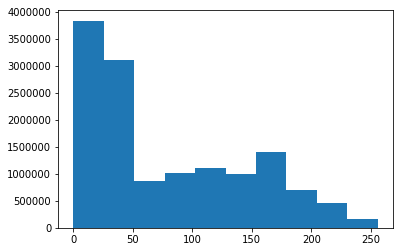

In [105]:
plt.hist(train_data['Customer_Seniority'])

In [106]:
train_data['Customer_Seniority'] = train_data['Customer_Seniority'].astype('category')

Datatype -  float64


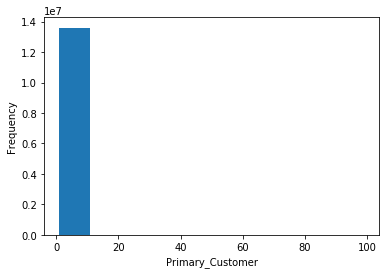

Percent of null values -  0.2032195504622926  %


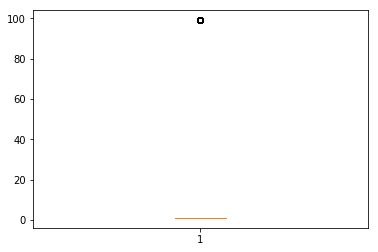

In [36]:
generate_viz(train_data,'Primary_Customer')

In [109]:
train_data['Primary_Customer'].fillna(1.0,inplace=True)
train_data['Primary_Customer'] = train_data['Primary_Customer'].astype('category')

In [110]:
train_data['Primary_Customer'].isnull().sum()

0

Datatype - datetime64[ns]


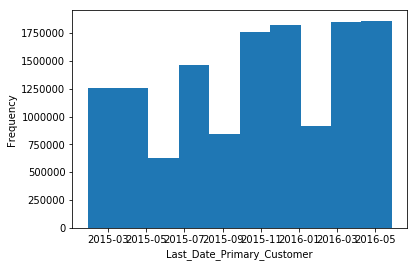

Datatype -  datetime64[ns]
Percent of null values -  99.81833048551916  %


In [37]:
generate_viz(train_data,'Last_Date_Primary_Customer')

In [111]:
train_data['Last_Date_Primary_Customer'].isnull().sum()

13622516

In [112]:
# 99% null values therefore dropping column
train_data.drop('Last_Date_Primary_Customer',axis=1,inplace=True)

Datatype - category


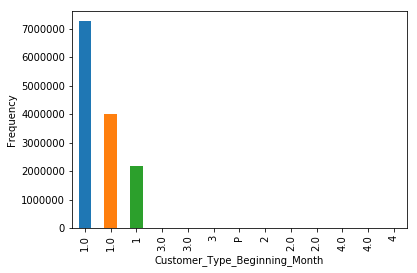

Percent of null values -  1.097513070159106  %


In [38]:
generate_viz(train_data,'Customer_Type_Beginning_Month')

In [120]:
train_data['Customer_Type_Beginning_Month'].unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 5, '4',
       4.0, '2'], dtype=object)

In [119]:
train_data['Customer_Type_Beginning_Month'].replace('P',5,inplace=True)

In [121]:
train_data['Customer_Type_Beginning_Month'].astype('float').mode()

0    1.0
dtype: float64

In [123]:
train_data['Customer_Type_Beginning_Month'].fillna(1.0,inplace=True)

In [126]:
train_data['Customer_Type_Beginning_Month'] = train_data['Customer_Type_Beginning_Month'].astype('float')

In [128]:
train_data['Customer_Type_Beginning_Month'].isnull().sum()

0

Datatype - category


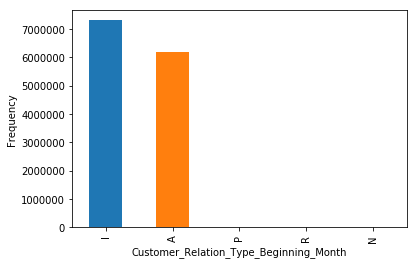

Percent of null values -  1.097513070159106  %


In [39]:
generate_viz(train_data,'Customer_Relation_Type_Beginning_Month')

In [131]:
(train_data['Customer_Relation_Type_Beginning_Month']=='N').sum()

0

In [130]:
train_data['Customer_Relation_Type_Beginning_Month'].replace('N',np.nan,inplace=True)

In [133]:
train_data['Customer_Relation_Type_Beginning_Month'].fillna('I',inplace=True)

In [134]:
train_data['Customer_Relation_Type_Beginning_Month'].isnull().sum()

0

Datatype - category


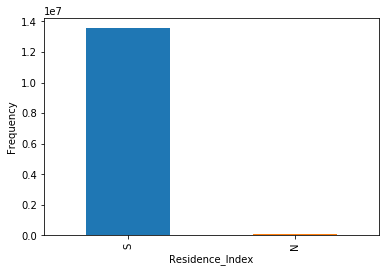

Percent of null values -  0.2032195504622926  %


In [40]:
generate_viz(train_data,'Residence_Index')

In [135]:
train_data['Residence_Index'].mode()

0    S
Name: Residence_Index, dtype: category
Categories (2, object): [N, S]

In [136]:
train_data['Residence_Index'].fillna('S',inplace=True)

In [137]:
train_data['Residence_Index'].isnull().sum()

0

Datatype - category


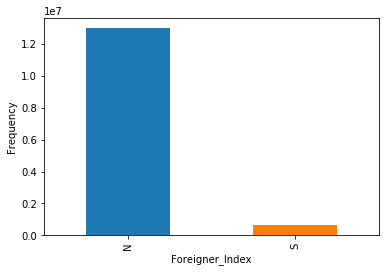

Percent of null values -  0.2032195504622926  %


In [41]:
generate_viz(train_data,'Foreigner_Index')

In [138]:
train_data['Foreigner_Index'].mode()

0    N
Name: Foreigner_Index, dtype: category
Categories (2, object): [N, S]

In [139]:
train_data['Foreigner_Index'].fillna('N',inplace=True)

In [140]:
train_data['Foreigner_Index'].isnull().sum()

0

Datatype - category


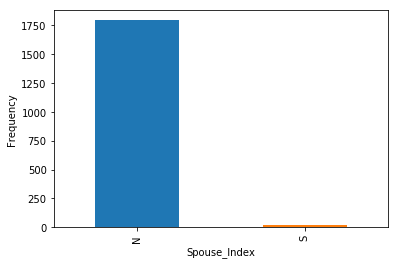

Percent of null values -  99.98675196699949  %


In [42]:
generate_viz(train_data,'Spouse_Index')#to be dropped

In [141]:
train_data.drop('Spouse_Index',axis=1,inplace=True)

Datatype - category


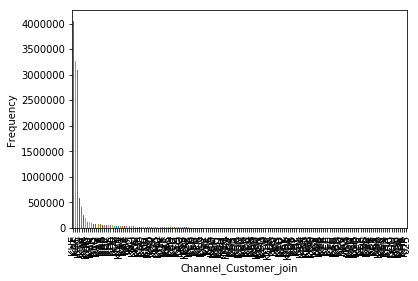

Percent of null values -  1.363909910737714  %


In [43]:
generate_viz(train_data,'Channel_Customer_join')

In [145]:
train_data['Channel_Customer_join'].mode()

0    KHE
Name: Channel_Customer_join, dtype: category
Categories (162, object): [004, 007, 013, 025, ..., KHQ, KHR, KHS, RED]

In [146]:
train_data['Channel_Customer_join'].fillna('KHE',inplace=True)

In [147]:
train_data['Channel_Customer_join'].isnull().sum()

0

Datatype - category


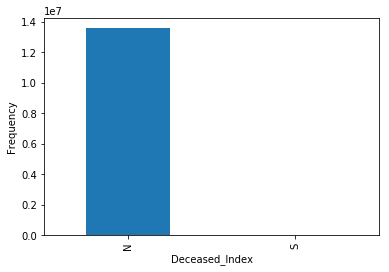

Percent of null values -  0.2032195504622926  %


In [44]:
generate_viz(train_data,'Deceased_Index')

In [143]:
train_data['Deceased_Index'].fillna('N',inplace=True)

In [144]:
train_data['Deceased_Index'].isnull().sum()

0

Datatype -  float64


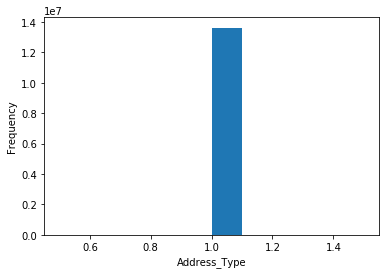

Percent of null values -  0.2032268779141734  %


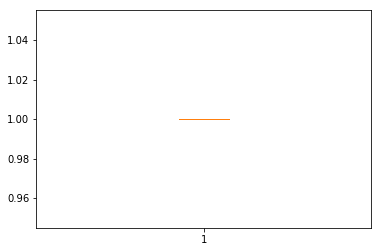

In [45]:
generate_viz(train_data,'Address_Type')

In [148]:
(train_data['Address_Type']==1).sum()

13619574

In [149]:
train_data['Address_Type'].fillna(1,inplace=True)

Datatype -  float64


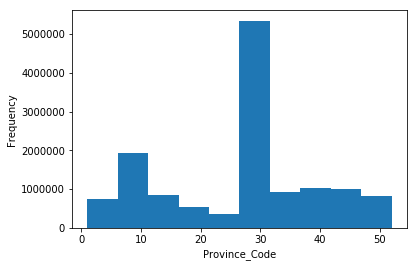

Percent of null values -  0.6857835489765784  %


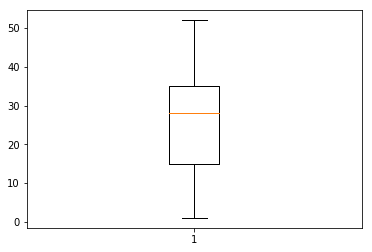

In [47]:
generate_viz(train_data,'Province_Code')

In [150]:
train_data['Province_Code'].mode()

0    28.0
dtype: float64

In [151]:
train_data['Province_Code'].fillna(28,inplace=True)

In [152]:
train_data['Province_Code'] = train_data['Province_Code'].astype('category')

Datatype - category


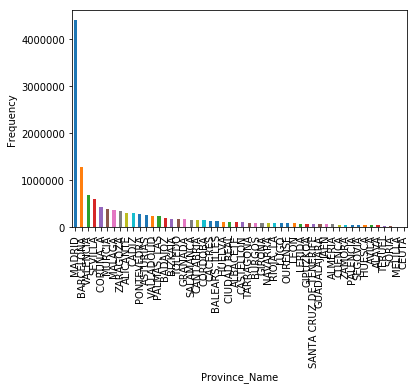

Percent of null values -  0.6857835489765784  %


In [48]:
generate_viz(train_data,'Province_Name')

In [153]:
train_data['Province_Name'].fillna('MADRID',inplace=True)

In [154]:
train_data['Province_Name'] = train_data['Province_Name'].astype('category')

Datatype -  float64


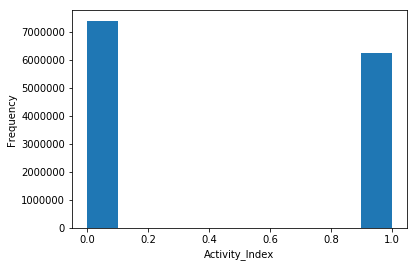

Percent of null values -  0.2032195504622926  %


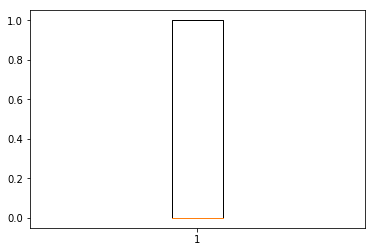

In [49]:
generate_viz(train_data,'Activity_Index')

In [155]:
train_data['Activity_Index'].fillna(1,inplace=True)

In [156]:
train_data['Activity_Index'] = train_data['Activity_Index'].astype('category')

Datatype -  float64


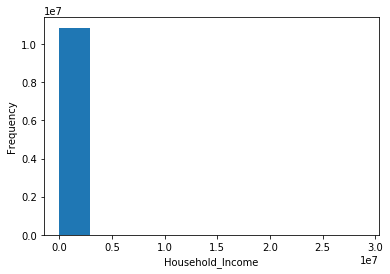

Percent of null values -  20.475648349429182  %


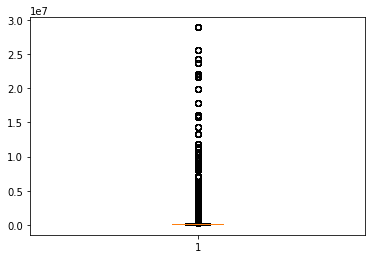

In [50]:
generate_viz(train_data,'Household_Income')

Datatype - category


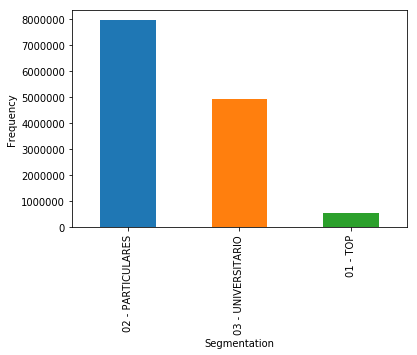

Percent of null values -  1.3875849077646003  %


In [51]:
generate_viz(train_data,'Segmentation')

In [157]:
train_data['Segmentation'].mode()

0    02 - PARTICULARES
Name: Segmentation, dtype: category
Categories (3, object): [01 - TOP, 02 - PARTICULARES, 03 - UNIVERSITARIO]

In [158]:
train_data['Segmentation'].fillna('02 - PARTICULARES',inplace=True)

In [159]:
train_data['Segmentation'] = train_data['Segmentation'].astype('category')

Datatype -  int64


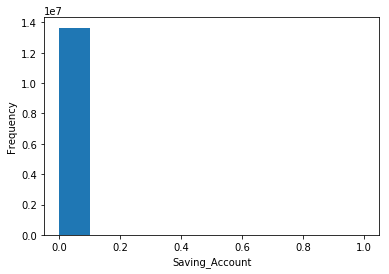

Percent of null values -  0.0  %


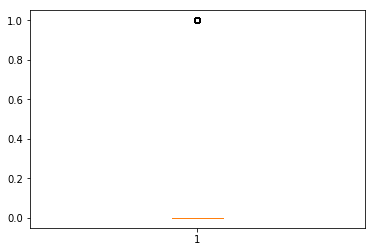

In [53]:
generate_viz(train_data,'Saving_Account')

In [160]:
train_data['Saving_Account'] = train_data['Saving_Account'].astype('category')

Datatype -  int64


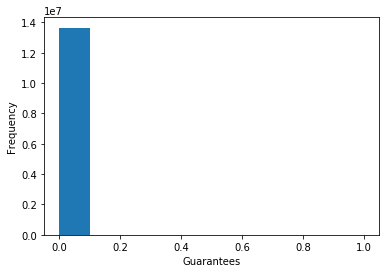

Percent of null values -  0.0  %


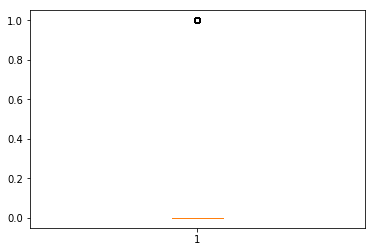

In [54]:
generate_viz(train_data,'Guarantees')

In [161]:
train_data['Guarantees'] = train_data['Guarantees'].astype('category')

Datatype -  int64


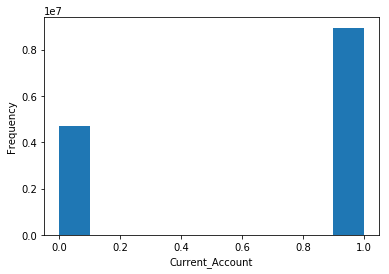

Percent of null values -  0.0  %


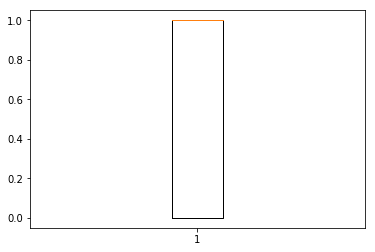

In [55]:
generate_viz(train_data,'Current_Account')

In [162]:
train_data['Current_Account'] = train_data['Current_Account'].astype('category')

Datatype -  int64


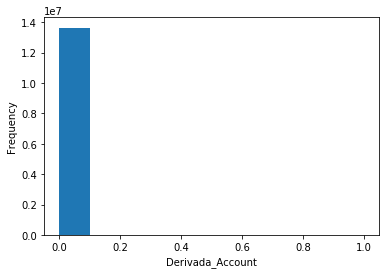

Percent of null values -  0.0  %


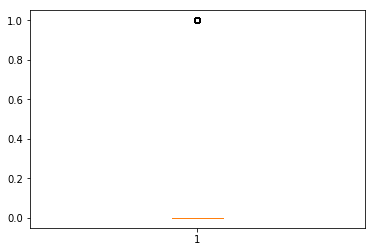

In [56]:
generate_viz(train_data,'Derivada_Account')

In [163]:
train_data['Derivada_Account'] = train_data['Derivada_Account'].astype('category')

Datatype -  int64


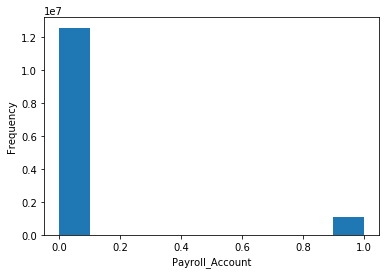

Percent of null values -  0.0  %


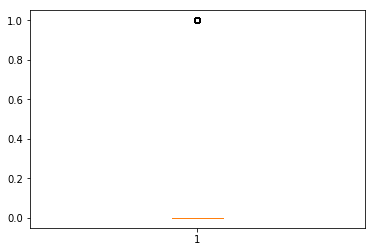

In [57]:
generate_viz(train_data,'Payroll_Account')

In [164]:
train_data['Payroll_Account'] = train_data['Payroll_Account'].astype('category')

Datatype -  int64


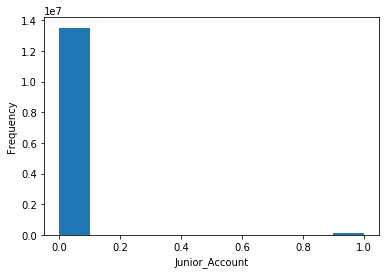

Percent of null values -  0.0  %


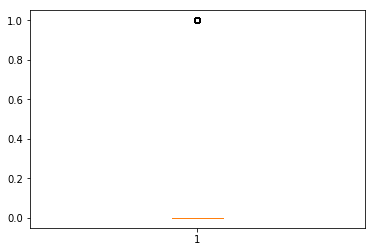

In [58]:
generate_viz(train_data,'Junior_Account')

In [165]:
train_data['Junior_Account'] = train_data['Junior_Account'].astype('category')

Datatype -  int64


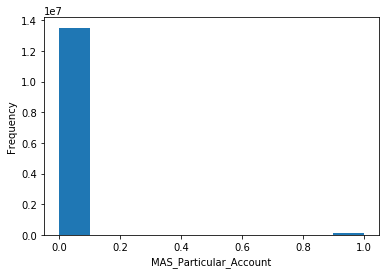

Percent of null values -  0.0  %


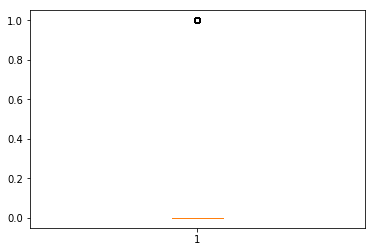

In [59]:
generate_viz(train_data,'MAS_Particular_Account')

In [166]:
train_data['MAS_Particular_Account'] = train_data['MAS_Particular_Account'].astype('category')

Datatype -  int64


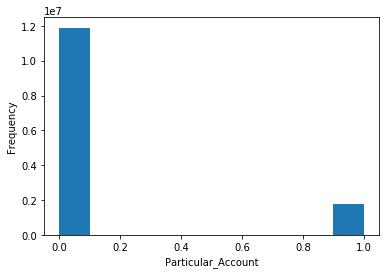

Percent of null values -  0.0  %


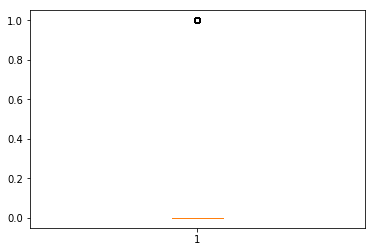

In [60]:
generate_viz(train_data,'Particular_Account')

In [167]:
train_data['Particular_Account'] = train_data['Particular_Account'].astype('category')

Datatype -  int64


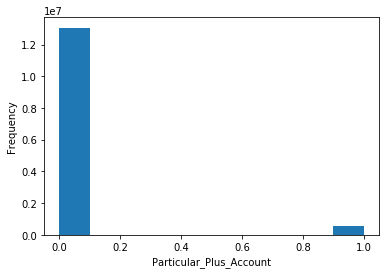

Percent of null values -  0.0  %


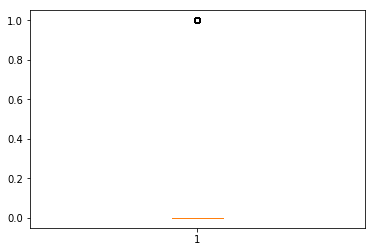

In [61]:
generate_viz(train_data,'Particular_Plus_Account')

In [168]:
train_data['Particular_Plus_Account'] = train_data['Particular_Plus_Account'].astype('category')

Datatype -  int64


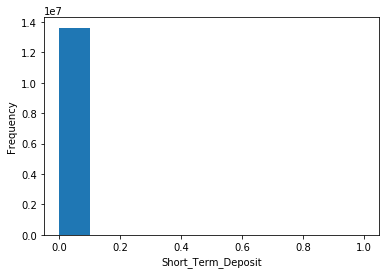

Percent of null values -  0.0  %


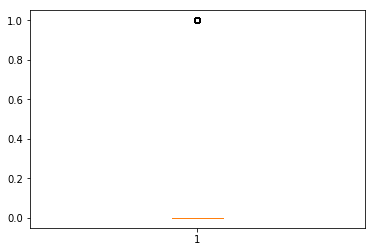

In [62]:
generate_viz(train_data,'Short_Term_Deposit')

In [169]:
train_data['Short_Term_Deposit'] = train_data['Short_Term_Deposit'].astype('category')

Datatype -  int64


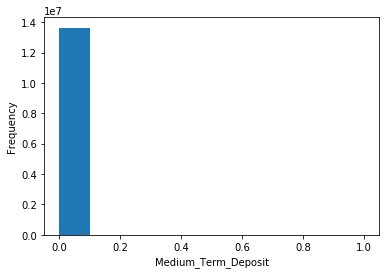

Percent of null values -  0.0  %


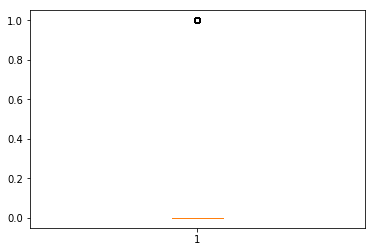

In [63]:
generate_viz(train_data,'Medium_Term_Deposit')

In [170]:
train_data['Medium_Term_Deposit'] = train_data['Medium_Term_Deposit'].astype('category')

Datatype -  int64


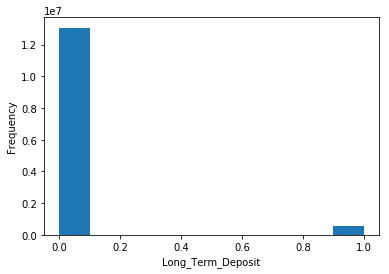

Percent of null values -  0.0  %


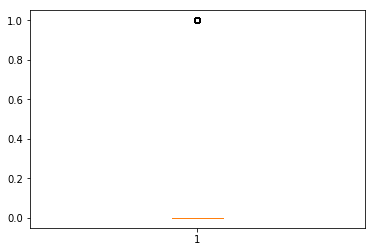

In [64]:
generate_viz(train_data,'Long_Term_Deposit')

In [171]:
train_data['Long_Term_Deposit'] = train_data['Long_Term_Deposit'].astype('category')

Datatype -  int64


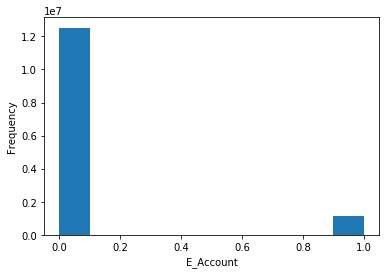

Percent of null values -  0.0  %


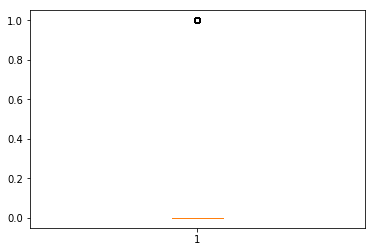

In [65]:
generate_viz(train_data,'E_Account')

In [172]:
train_data['E_Account'] = train_data['E_Account'].astype('category')

Datatype -  int64


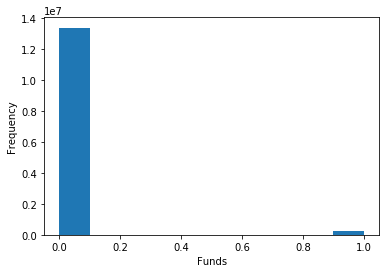

Percent of null values -  0.0  %


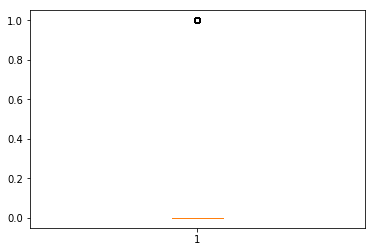

In [66]:
generate_viz(train_data,'Funds')

In [173]:
train_data['Funds'] = train_data['Funds'].astype('category')

Datatype -  int64


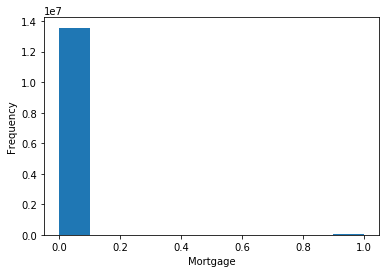

Percent of null values -  0.0  %


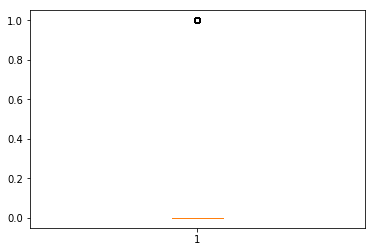

In [67]:
generate_viz(train_data,'Mortgage')

In [174]:
train_data['Mortgage'] = train_data['Mortgage'].astype('category')

Datatype -  float64


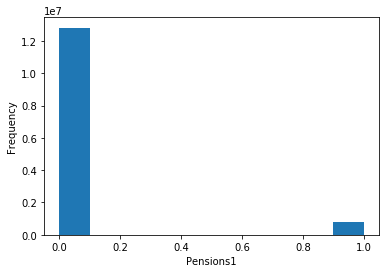

Percent of null values -  0.11770085956139778  %


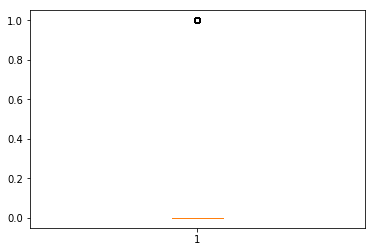

In [68]:
generate_viz(train_data,'Pensions1')

In [175]:
train_data['Pensions1'] = train_data['Pensions1'].astype('category')

Datatype -  int64


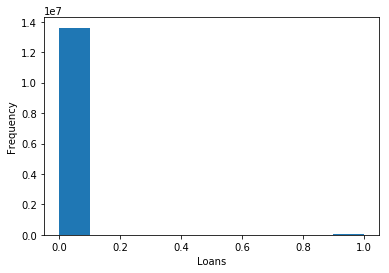

Percent of null values -  0.0  %


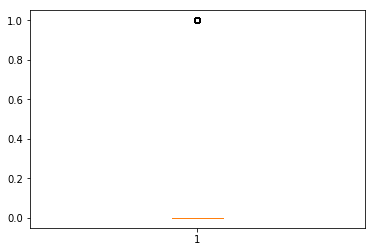

In [69]:
generate_viz(train_data,'Loans')

In [176]:
train_data['Loans'] = train_data['Loans'].astype('category')

Datatype -  int64


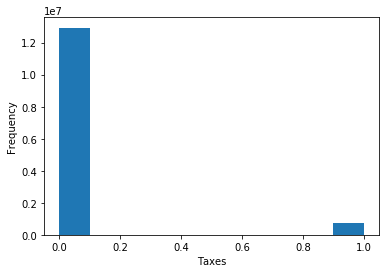

Percent of null values -  0.0  %


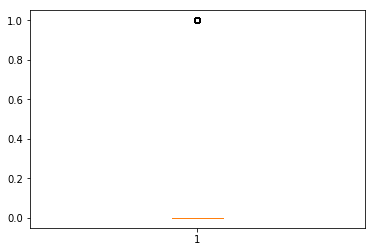

In [70]:
generate_viz(train_data,'Taxes')

In [177]:
train_data['Taxes'] = train_data['Taxes'].astype('category')

Datatype -  int64


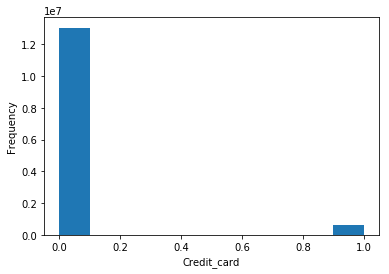

Percent of null values -  0.0  %


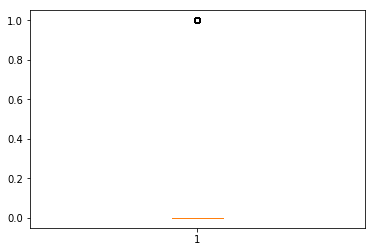

In [72]:
generate_viz(train_data,'Credit_card')

In [178]:
train_data['Credit_card'] = train_data['Credit_card'].astype('category')

Datatype -  int64


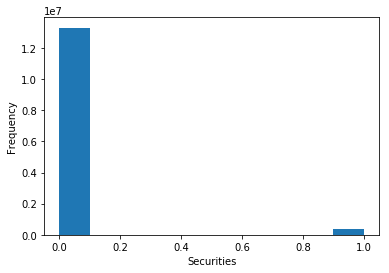

Percent of null values -  0.0  %


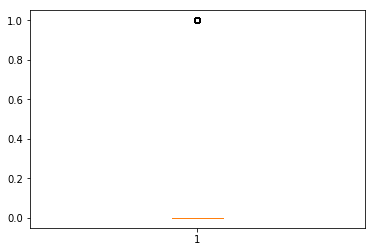

In [73]:
generate_viz(train_data,'Securities')

In [179]:
train_data['Securities'] = train_data['Securities'].astype('category')

Datatype -  int64


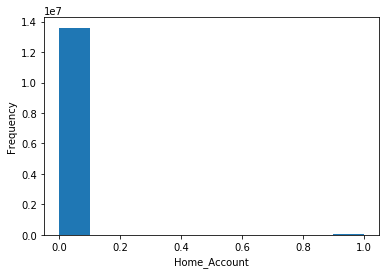

Percent of null values -  0.0  %


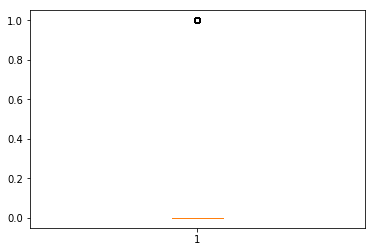

In [74]:
generate_viz(train_data,'Home_Account')

In [180]:
train_data['Home_Account'] = train_data['Home_Account'].astype('category')

Datatype -  float64


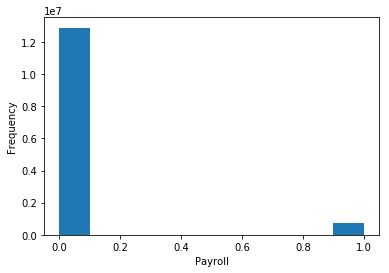

Percent of null values -  0.11770085956139778  %


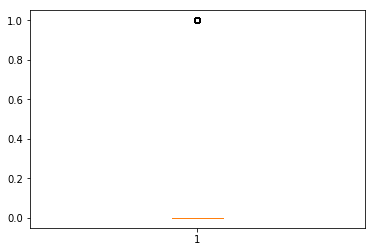

In [75]:
generate_viz(train_data,'Payroll')

In [181]:
train_data['Payroll'] = train_data['Payroll'].astype('category')

Datatype -  float64


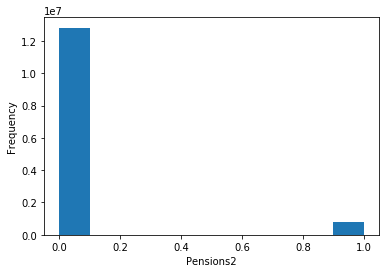

Percent of null values -  0.11770085956139778  %


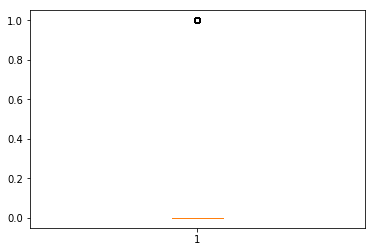

In [76]:
generate_viz(train_data,'Pensions2')

In [182]:
train_data['Pensions2'] = train_data['Pensions2'].astype('category')

Datatype -  int64


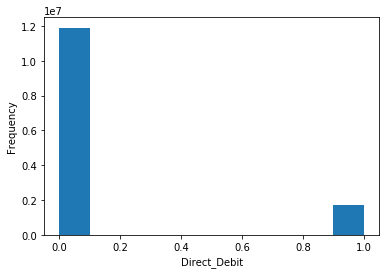

Percent of null values -  0.0  %


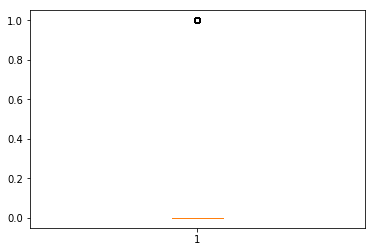

In [77]:
generate_viz(train_data,'Direct_Debit')

In [183]:
train_data['Direct_Debit'] = train_data['Direct_Debit'].astype('category')

In [188]:
train_data.isnull().sum()

Date                                            0
Customer_Code                                   0
Customers_Country_Residence                 27734
Sex                                         27804
Age                                         27734
Date_Acc_Open                               27734
New_customer_index                          27734
Customer_Seniority                              0
Primary_Customer                                0
Customer_Type_Beginning_Month                   0
Customer_Relation_Type_Beginning_Month          0
Residence_Index                                 0
Foreigner_Index                                 0
Channel_Customer_join                           0
Deceased_Index                                  0
Address_Type                                    0
Province_Code                                   0
Province_Name                                   0
Activity_Index                                  0
Household_Income                          2794375


In [185]:
train_data.to_pickle("Cleaned_Data/train.pkl")

In [187]:
train_data.drop('Employee_Index',axis=1,inplace=True)

Datatype - category


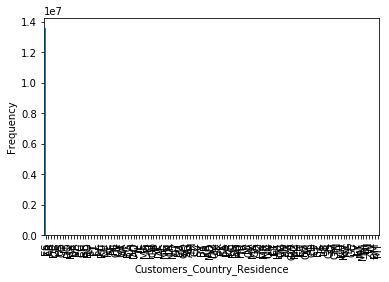

Percent of null values -  0.0  %


In [194]:
generate_viz(train_data,'Customers_Country_Residence')

In [191]:
train_data['Customers_Country_Residence'].mode()

0    ES
Name: Customers_Country_Residence, dtype: category
Categories (118, object): [AD, AE, AL, AO, ..., VE, VN, ZA, ZW]

In [193]:
train_data['Customers_Country_Residence'].fillna('ES',inplace=True)

Datatype - category


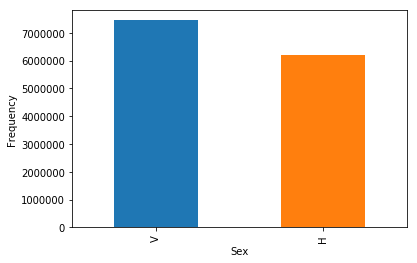

Percent of null values -  0.0  %


In [197]:
generate_viz(train_data,'Sex')

In [196]:
train_data['Sex'].fillna('V',inplace=True)

Datatype -  float64


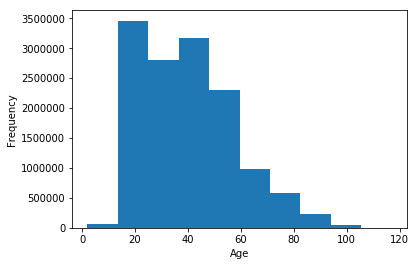

Percent of null values -  0.0  %


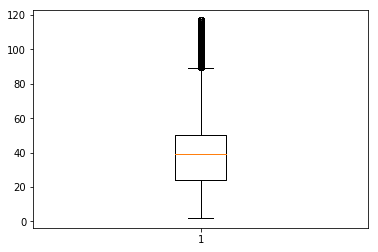

In [221]:
generate_viz(train_data,'Age')

In [212]:
train_data['Age'] = train_data['Age'].astype('float')

In [213]:
train_data['Age'][train_data['Age']>122] = np.nan

In [219]:
train_data['Age'].mode()

0    23.0
dtype: float64

In [220]:
train_data['Age'].fillna(23.0,inplace=True)

Datatype - datetime64[ns]


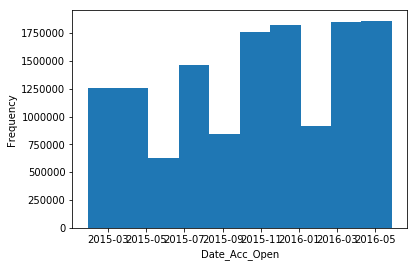

Datatype -  datetime64[ns]
Percent of null values -  0.0  %


In [229]:
generate_viz(train_data,'Date_Acc_Open')

In [223]:
train_data['Date_Acc_Open'].mode()

0   2014-07-28
dtype: datetime64[ns]

In [226]:
import datetime
train_data['Date_Acc_Open'].fillna('2014-07-28',inplace=True)

In [228]:
train_data['Date_Acc_Open'] = pd.to_datetime(train_data['Date_Acc_Open'])

Datatype -  float64


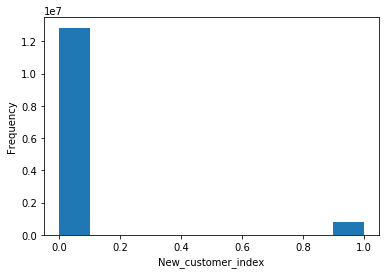

Percent of null values -  0.0  %


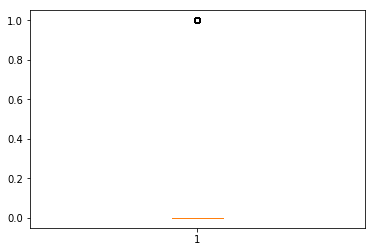

In [234]:
generate_viz(train_data,'New_customer_index')

In [232]:
train_data['New_customer_index'].mode()

0    0.0
dtype: float64

In [233]:
train_data['New_customer_index'].fillna(0.0,inplace=True)

Datatype -  float64


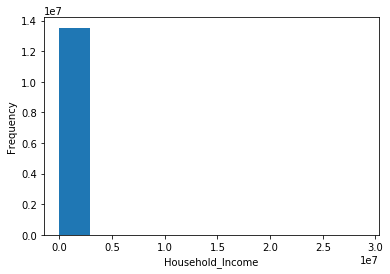

Percent of null values -  0.8175091514378402  %


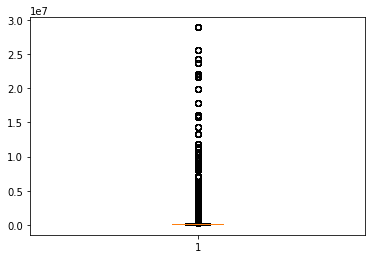

In [266]:
generate_viz(train_data,'Household_Income')

In [256]:
train_data['Activity_Index'].unique()

[1.0, 0.0]
Categories (2, float64): [1.0, 0.0]

In [260]:
provinces = train_data['Province_Name'].unique()
dates = train_data['Date'].unique()

for date in dates:
    # print(date)
    for province in provinces:
        # print(province)
        m0 = train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==0)].mean()
        m1 = train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==1)].mean()
        # print(m)
        train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==0)] = train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==0)].fillna(m0)
        train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==1)] = train_data['Household_Income'][(train_data['Date']==date) & (train_data['Province_Name']==province) & (train_data['Activity_Index']==1)].fillna(m1)

In [267]:
train_data['Household_Income'].isnull().sum()

111568

In [268]:
train_data.isnull().sum()

Date                                           0
Customer_Code                                  0
Customers_Country_Residence                    0
Sex                                            0
Age                                            0
Date_Acc_Open                                  0
New_customer_index                             0
Customer_Seniority                             0
Primary_Customer                               0
Customer_Type_Beginning_Month                  0
Customer_Relation_Type_Beginning_Month         0
Residence_Index                                0
Foreigner_Index                                0
Channel_Customer_join                          0
Deceased_Index                                 0
Address_Type                                   0
Province_Code                                  0
Province_Name                                  0
Activity_Index                                 0
Household_Income                          111568
Segmentation        

In [269]:
len(train_data)

13647309

In [271]:
train_data.dropna(axis=0,inplace=True)

In [272]:
train_data.isnull().sum().sum()

0

In [273]:
train_data.to_pickle("Cleaned_Data/train.pkl")

In [ ]:
generate_viz(train_data,'Customer_Relation_Type_Beginning_Month')
'Customer_Type_Beginning_Month',
       'Customer_Relation_Type_Beginning_Month', 'Residence_Index',
       'Foreigner_Index', 'Spouse_Index', 'Channel_Customer_join',
       'Deceased_Index', 'Address_Type', 'Province_Code', 'Province_Name',
       'Activity_Index', 'Household_Income', 'Segmentation', 'Saving_Account',
       'Guarantees', 'Current_Account', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'MAS_Particular_Account', 'Particular_Account',
       'Particular_Plus_Account', 'Short_Term_Deposit', 'Medium_Term_Deposit',
       'Long_Term_Deposit', 'E_Account', 'Funds', 'Mortgage', 'Pensions1',
       'Loans', 'Taxes', 'Credit_card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions2', 'Direct_Debit'